<a href="https://colab.research.google.com/github/mickeykim70/keras_study/blob/main/7_2_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import keras
from keras import layers, optimizers, activations, utils

In [32]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu", name="my_first_layer")(inputs)
outputs = layers.Dense(10, activation="softmax", name="my_second_layer")(features)
model = keras.Model(name="my_model2",inputs=inputs, outputs=outputs)

In [33]:
model.summary()

Model: "my_model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_first_layer (Dense)               │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_second_layer (Dense)              │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

## Multi-input, multi-output functional model

In [35]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# Define model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# Apply an intermediate layer to recombine input features into richer representations
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

# Define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

# Create the model by specifying its inputs and outputs
model = keras.Model(inputs=[title, text_body, tags],
                    outputs=[priority, department])


In [36]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)        │ (None, 10000)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_body (InputLayer)    │ (None, 10000)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tags (InputLayer)         │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 20100)          │              0 │ title[0][0],           │
│ (Concatenate)             │                        │                │ text_body[0][0],       │
│                           │                        │                │ tags[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │      1,286,464 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ priority (Dense)          │ (None, 1)              │             65 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ department (Dense)        │ (None, 4)              │            260 │ dense_8[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

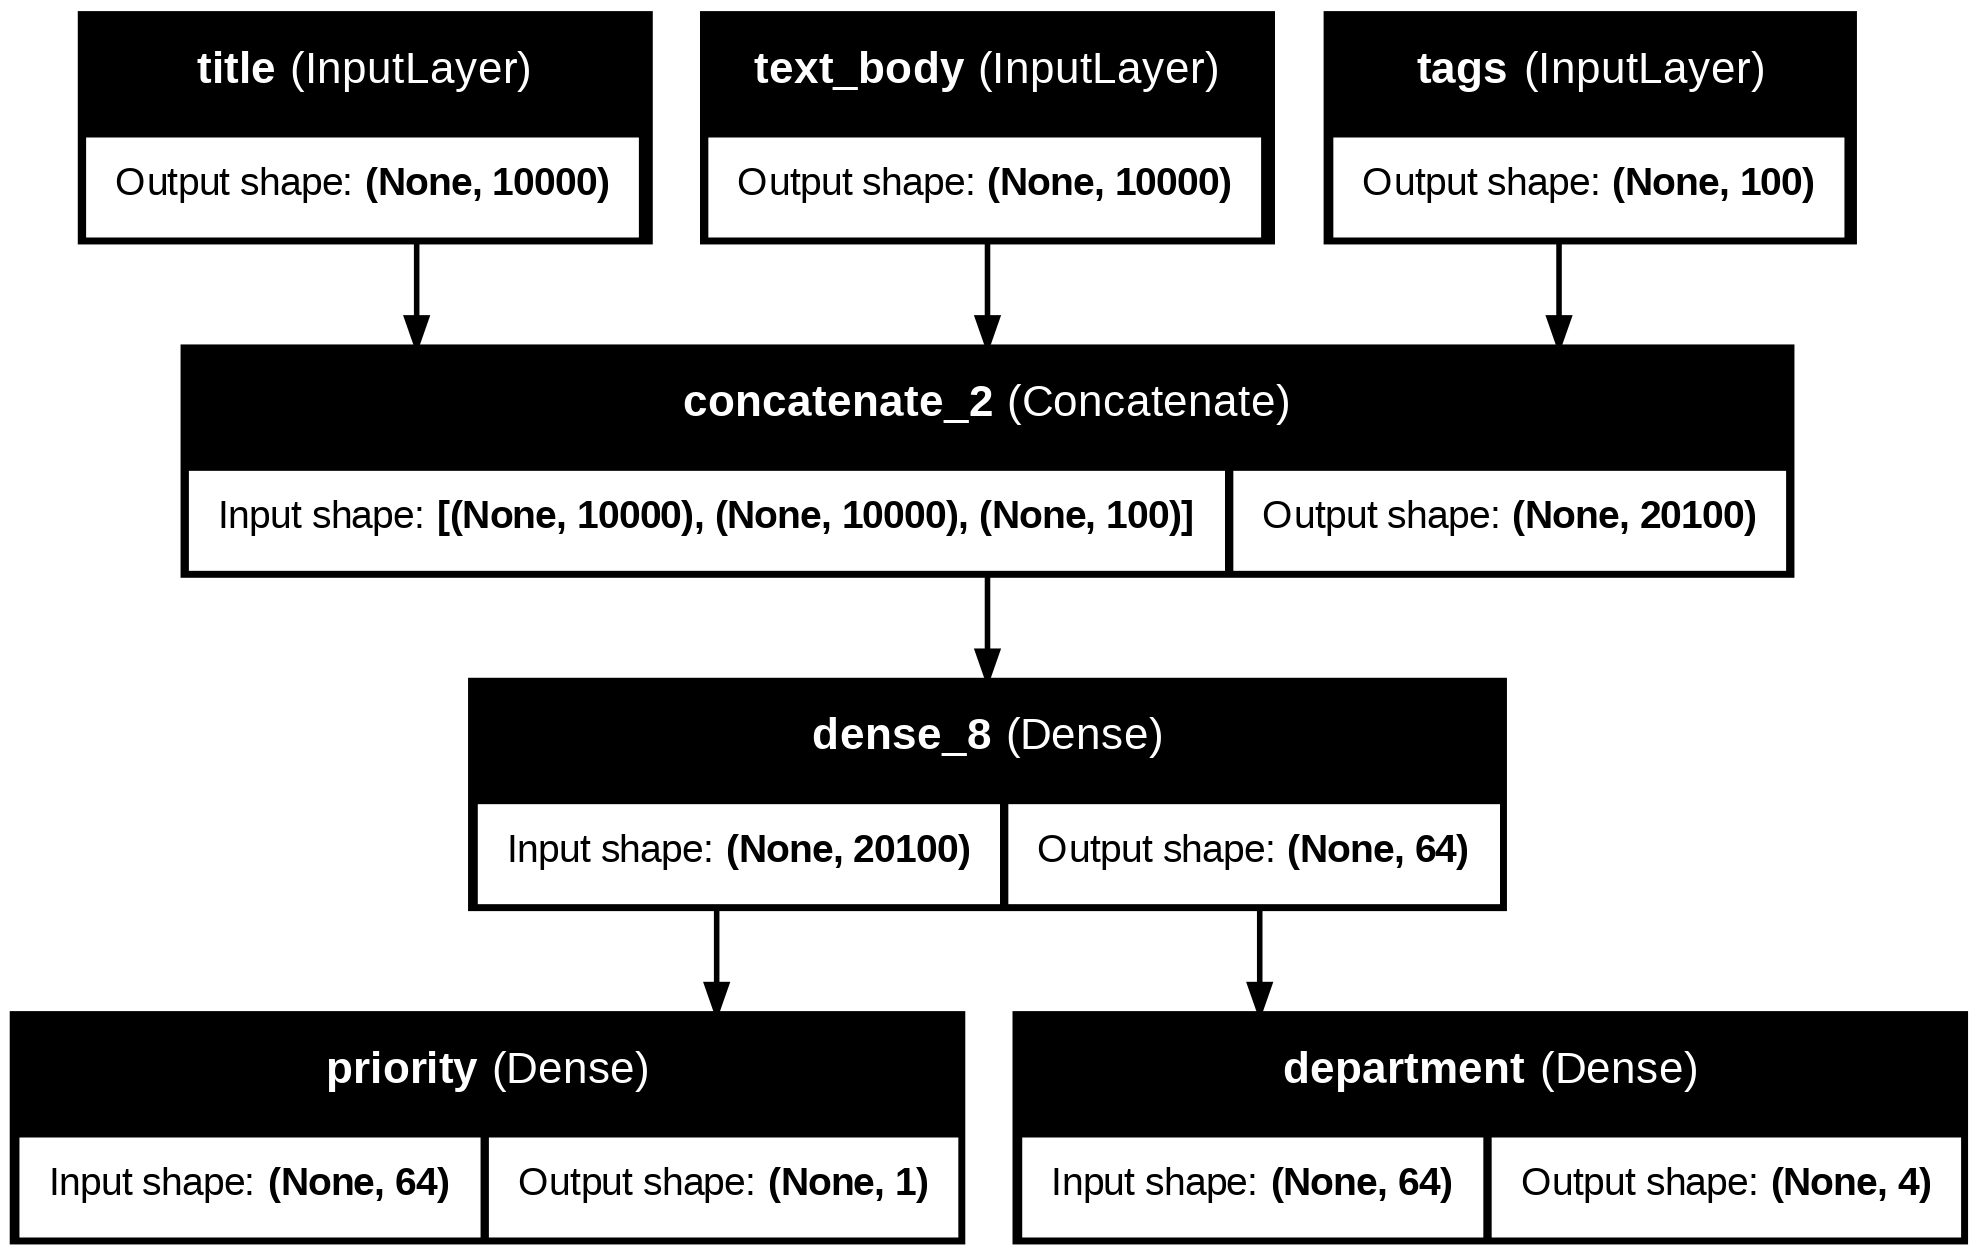

In [41]:
utils.plot_model(model, "ticket_classifier.png", show_layer_names=True, show_shapes=True)

## Training a model by providing lists of input and target arrays

In [27]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error",
                    "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"],
                       "department": ["accuracy"]})

model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data,
           "department": department_data},
            epochs=1)

model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data,
                "department": department_data})

priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(32, 4), output.shape=(32, 1)

In [29]:
print("department_data shape:", department_data.shape)
print("num_departments:", num_departments)

department_data shape: (1280, 4)
num_departments: 4


In [30]:
print("department_data 예시:")
print(department_data[:5])

department_data 예시:
[[1 0 1 1]
 [1 1 0 1]
 [0 0 0 0]
 [1 1 1 1]
 [1 0 1 0]]
